### *Kmean clustering to group customers of retail store based on their purchase history*

 dataset:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Importing libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
# loading dataset
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### analyzing the data

In [ ]:
# data analysis
data.info()
# Checking for the missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# defining the datapoint
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Adding cluster labels to the data
data['Cluster'] = labels


# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


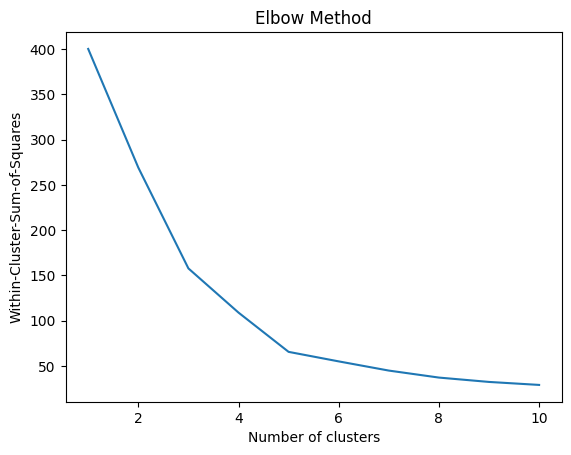

In [ ]:
# Using the Elbow method to find the optimal number of clusters
# Within-Cluster-Sum-of-Squares -> Wcss
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()


optimal_clusters = 4

# KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
kmeans.fit(X_scaled)

# cluster labels
labels = kmeans.labels_

# Adding cluster labels to the data
data['Cluster'] = labels



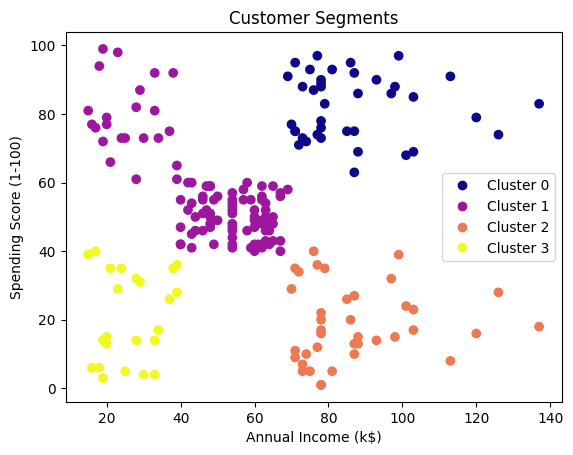

In [ ]:
# Visualizing
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='plasma')

# Adding a legend to identify clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(optimal_clusters)])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()


In [ ]:
# Displaying the first few rows of the data with cluster labels
data.head(197)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
192,193,Male,33,113,8,2
193,194,Female,38,113,91,0
194,195,Female,47,120,16,2
195,196,Female,35,120,79,0
